## PyTorch Tensor Slicing and Concatenation

In [1]:
import torch

## Slicing and Concatenation

### Indexing and Slicing

Prepare target tensor.

In [2]:
x = torch.FloatTensor([[[1, 2],
                        [3, 4]],
                       [[5, 6],
                        [7, 8]],
                       [[9, 10],
                        [11, 12]]])
print(x)
print('')
print(x.size())

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

torch.Size([3, 2, 2])


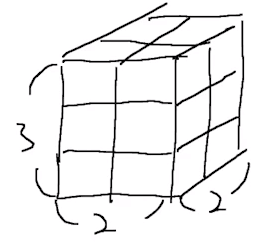

Access to certain dimension.

In [3]:
print(x[0])
print(x[0, :])
print(x[0, :, :])
# 위 세 코드는 같은 역할을 함

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])


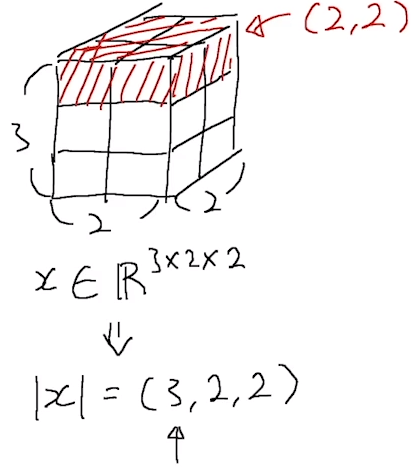

In [4]:
print(x[-1])
print(x[-1, :])
print(x[-1, :, :])

tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])


파란색 부분이 x[-1]
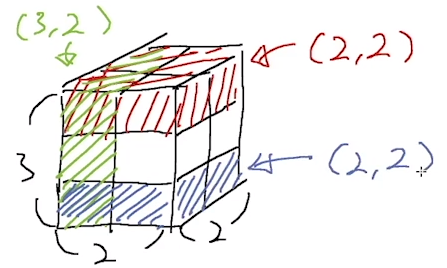

In [5]:
print(x[:, 0, :])

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])


초록색 표시 부분이 x[:,0,:]
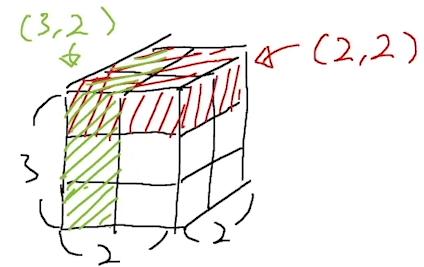

**Access by range. Note that the number of dimensions would not be changed.**
- range로 하면 element가 1이더라도 사라지지 않고 차원은 유지된다!!!

In [3]:
# range로 하면 element가 1이더라도 사라지지 않고 차원은 유지된다!!!
print(x[1:3, :, :].size())
print(x[:, :1, :].size())
print(x[:, :-1, :].size())

torch.Size([2, 2, 2])
torch.Size([3, 1, 2])
torch.Size([3, 1, 2])


x[1:3, :, : ]
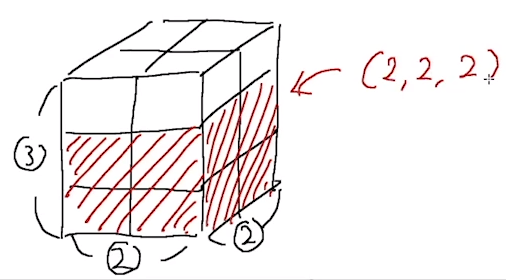

x[:,:1,:] 파란색 부분
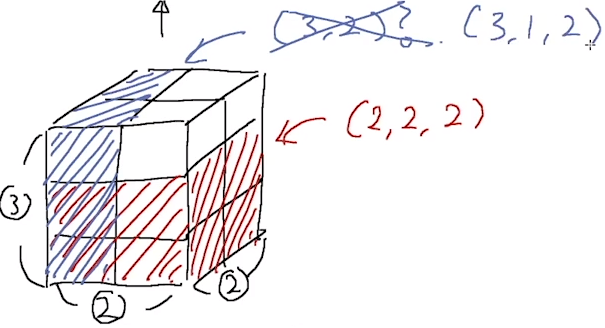

### split: Split tensor to desirable shapes.
- 원하는 모양으로 쪼갬!

In [5]:
x = torch.FloatTensor(10, 4)

In [7]:
splits = x.split(4, dim=0) # 0번 dim이 4가 되도록 split해줘라! 남은 거는 알아서 챙겨놔라!
# split된 결과는 리스트 형태로 저장됨

print(splits)

for s in splits:
    print(s.size())

# 기존에 x가 (10,4)였어서 dim=0이 4개씩이 되도록 => (4,4), (4,4) 만들고 남은 (2,4) 반환

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  7.2672e+34, -2.0376e-40],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]), tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), tensor([[ 0.0000e+00,  0.0000e+00,  7.0400e+34, -2.0412e-40],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]))
torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([2, 4])


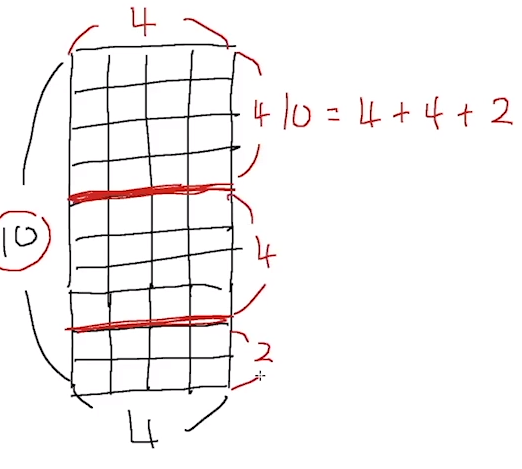

위 결과에서 보면, [4,4], [4,4], [2,4]가 나옴!
=> 4씩 떼고 남은 2도 챙겨놨구나!

In [1]:
splits3 = x.split(3, dim=0)
splits3

NameError: name 'x' is not defined

### chunk: Split tensor to number of chunks.
- chunk는 개수로 쪼갬!

In [9]:
x = torch.FloatTensor(8, 4)

In [10]:
chunks = x.chunk(3, dim=0) # 0번 dim 기준으로 Tensor를 3개로 쪼개라!

for c in chunks:
    print(c.size())

torch.Size([3, 4])
torch.Size([3, 4])
torch.Size([2, 4])


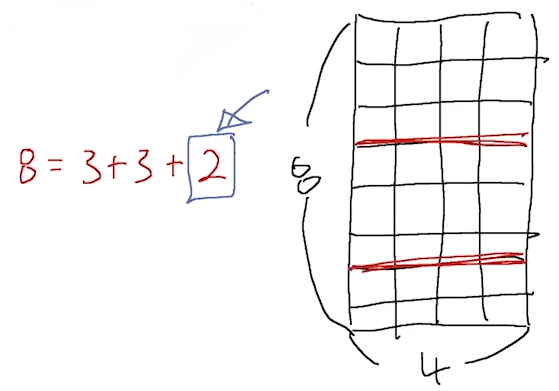

In [2]:
chunks2 = x.chunk(2, dim = 0)
for c in chunks2:
    print(c, c.size())

NameError: name 'x' is not defined

**split이랑 chunk는 헷갈릴 수 있다! 강사님도 나중에 직접 쓸 때에는 헷갈려서 직접 pytorch documentation 보고 찾아서 쓴다고 하네**
- pytorch.org/docs

### index_select: Select elements by using dimension index.

In [11]:
x = torch.FloatTensor([[[1, 1],
                        [2, 2]],
                       [[3, 3],
                        [4, 4]],
                       [[5, 5],
                        [6, 6]]])
indice1 = torch.LongTensor([2, 1])

print(x.size())

torch.Size([3, 2, 2])


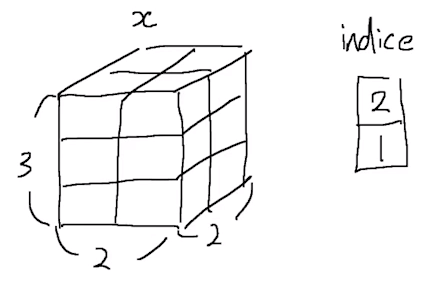

In [12]:
y = x.index_select(dim=0, index=indice1)

print(y)
print(y.size())

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])
torch.Size([2, 2, 2])


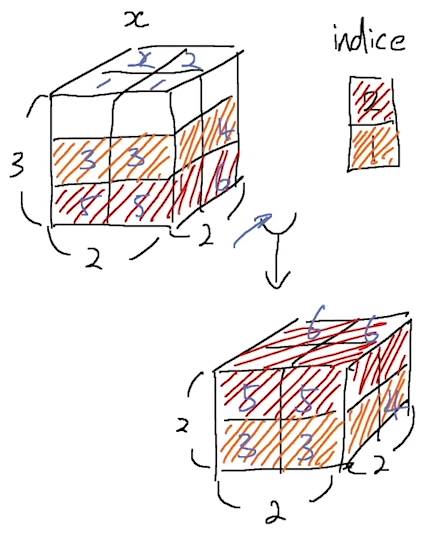

In [13]:
indice2 = torch.LongTensor([2,2])

# 중복 추출도 됨
z = x.index_select(dim=0, index = indice2)
print(z)
print(z.size())

tensor([[[5., 5.],
         [6., 6.]],

        [[5., 5.],
         [6., 6.]]])
torch.Size([2, 2, 2])


### cat: Concatenation of multiple tensors in the list.

In [13]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])
y = torch.FloatTensor([[10, 11, 12],  # y = x + 9로 해도 되겠네!
                       [13, 14, 15],
                       [16, 17, 18]])

print(x.size(), y.size())

torch.Size([3, 3]) torch.Size([3, 3])


In [14]:
z = torch.cat([x, y], dim=0)  # dim = n 방향으로 concat!!!
print(z)
print(z.size())

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])
torch.Size([6, 3])


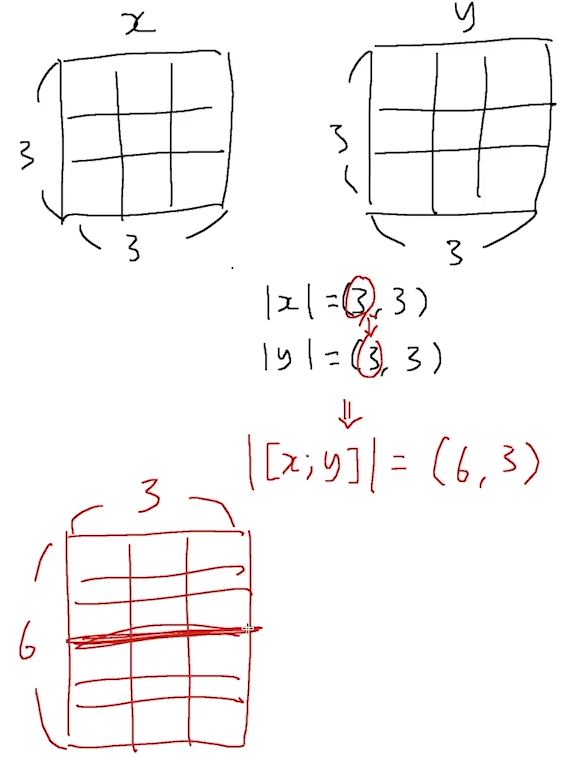

In [15]:
z = torch.cat([x, y], dim=-1) # dim = -1은 마지막 dim을 의미
print(z)
print(z.size())

tensor([[ 1.,  2.,  3., 10., 11., 12.],
        [ 4.,  5.,  6., 13., 14., 15.],
        [ 7.,  8.,  9., 16., 17., 18.]])
torch.Size([3, 6])


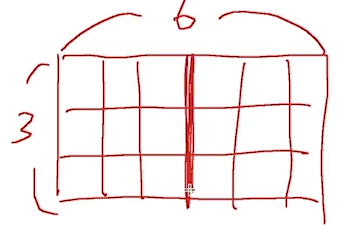

### stack: Stacking of multiple tensors in the list.
- stack은 쌓는 것.
- => 쌓는 거니까 차원이 하나 증가함

In [16]:
# 원래 x와 y는 각각 [3,3], [3,3] 크기인 Tensor였는데 dim = 0 (default) 기준으로 stack하고 나니까 [2,3,3]이 됨
# stack()을 하니까 일단 차원 수가 하나 증가함, dim = 0이 dafault니까 3차원 중 dim = 0을 기준으로 stack

z = torch.stack([x, y])
print(z)
print(z.size())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


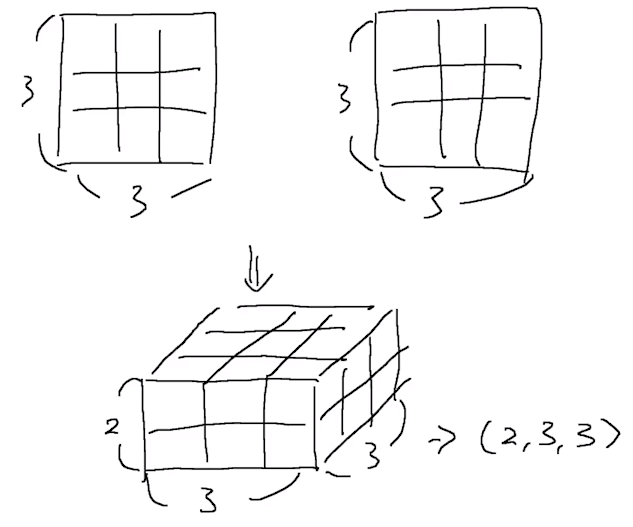

Or you can specify the dimension. Default is 0.

In [17]:
# stack()을 하니까 일단 차원 수가 하나 증가함, dim = 0이 dafault니까 3차원 중 dim = -1(3차원에서는 dim = 2)을 기준으로 stack

z = torch.stack([x, y], dim=-1)
print(z)
print(z.size())

tensor([[[ 1., 10.],
         [ 2., 11.],
         [ 3., 12.]],

        [[ 4., 13.],
         [ 5., 14.],
         [ 6., 15.]],

        [[ 7., 16.],
         [ 8., 17.],
         [ 9., 18.]]])
torch.Size([3, 3, 2])


**cat과 stack의 차이는?**
- cat은 이미 존재하는 dimension 상에서 붙임
- stack은 내가 원하는 dimension에 대해 **unsqueeze한 다음**에 붙임

1) torch.stack([x, y])
- (3,3), (3,3)이었던 거를 => (1,3,3), (1,3,3)으로 unsqueeze한 다음 붙이니까 (2,3,3)

2) torch.stack([x, y], dim=-1)
- (3,3), (3,3)이었던 거를 마지막 차원에 대해서 unsqueeze => (3,3,1), (3,3,1)하고 붙이니까 (3,3,2)

### Implement 'stack' function by using 'cat'.

In [18]:
# z = torch.stack([x, y])
z = torch.cat([x.unsqueeze(0), y.unsqueeze(0)], dim=0)
print(z)
print(z.size())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


### Useful Trick: Merge results from iterations

**이게 굉장히 많으 쓰이는 trick이라고 하심**

"처음부터 시작하는 딥러닝 유치원 Online." [Ch 04. 파이토치(PyTorch) Tutorials - 08.실습 텐서 자르기 * 붙이기] 28:03 부터 내용

In [19]:
result = []
for i in range(5):
    x = torch.FloatTensor(2, 2)
    result += [x]
# 여기까지 코드 실행 결과로, [2,2]인 Tensor 5개가 result라는 List 안에 들어가 있음
    
result = torch.stack(result)
result.size()

torch.Size([5, 2, 2])

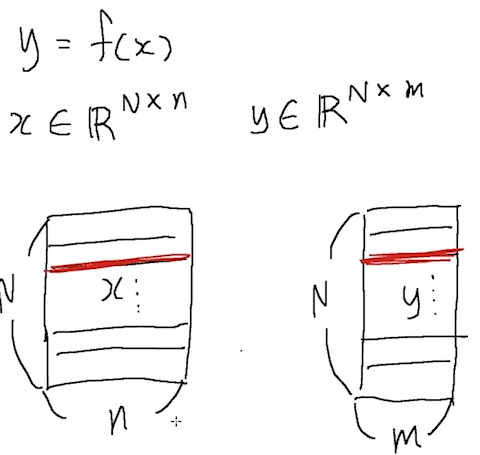

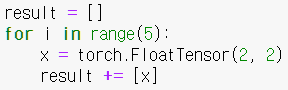

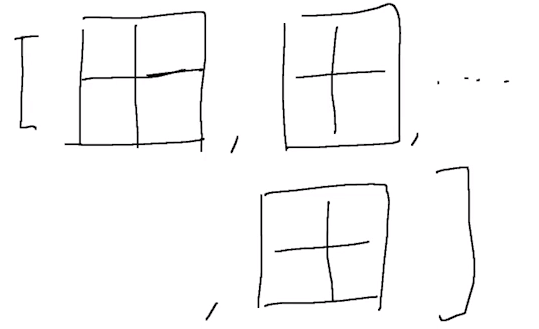

torch.stack(result)의 결과
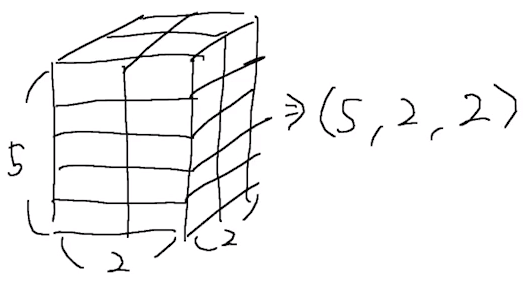